# Ford GoBike System Data Exploration - Presentation
## Oladimeji Olaniyan

## Investigation Overview

The variables in this presentation are focused on trip frequency, and how this changes depending on a number of different factors such as time of day, or day of week. The presentation will also seek to explore how the average trip duration changes depending on the user type and gender.

## Dataset Overview

This dataset includes information about individual rides made in a bike-sharing system covering the San Francisco Bay area. The data collected spans the period of February to March 2019. The information provided by the dataset focuses on user related variables such as gender and user type, station related variables such as station name and id, and time related variables such when the bike rides begin and end.

The structure of the dataset was initially 16 columns and 183,412 rows. However, after assessing and cleaning the data, we were left with 22 columns and 174,952 columns.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'whitegrid')
sns.set_context('paper')
base_color = sns.color_palette()[0]

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv(r'C:\Users\PC\Documents\GitHub\ALX-T\Project 03 - Data Visualization\Datasets\bike_data_clean.csv')

df.sample(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_of_day,start_day_of_week,start_month,end_time_of_day,end_day_of_week,end_month
32692,218,2019-02-24 09:37:39.202,2019-02-24 09:41:17.975,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1950.0,Female,No,9,Sunday,February,9,Sunday,February
75277,3357,2019-02-18 18:08:35.976,2019-02-18 19:04:32.998,371,Lombard St at Columbus Ave,37.802746,-122.413579,5,Powell St BART Station (Market St at 5th St),37.783899,...,Customer,1996.0,Male,No,18,Monday,February,19,Monday,February
13341,707,2019-02-27 14:24:05.455,2019-02-27 14:35:53.201,19,Post St at Kearny St,37.788975,-122.403452,93,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1988.0,Male,No,14,Wednesday,February,14,Wednesday,February


## Frequency of rides based on time of day.

One of the variables I explored in my analysis was the distribution of bike rides throughout the day and made the following observations. <br>
Most users start and finish their bike rides within the time of 8am in the morning and 5pm in the evening. According to a study done by Nate Silver; [Which Cities Sleep In, And Which Get To Work Early](https://fivethirtyeight.com/features/which-cities-sleep-in-and-which-get-to-work-early/) posted on [fivethirtyeight.com](https://fivethirtyeight.com) , the median arrival to work time in San Francisco is 8:17. This means we could make the safe assumption that most bike users within this time are workers heading out to work, and returning back from work which results in the increase in bike rides.



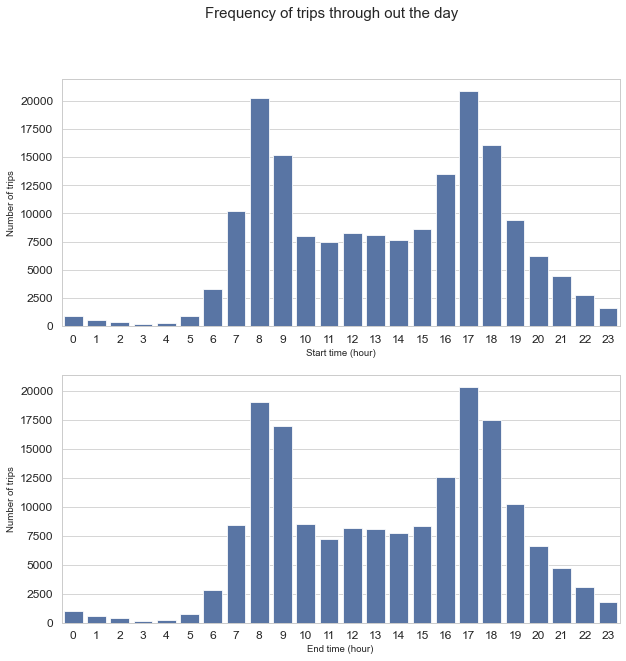

In [4]:
plt.figure(figsize = [10,10])
plt.suptitle('Frequency of trips through out the day', fontsize=15)

# start time
plt.subplot(2,1,1)
sns.countplot(data = df, x = 'start_time_of_day', color = base_color);
plt.xlabel('Start time (hour)');
plt.ylabel('Number of trips');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# end time
plt.subplot(2,1,2)
sns.countplot(data = df, x = 'end_time_of_day', color = base_color);
plt.xlabel('End time (hour)');
plt.ylabel('Number of trips');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Frequency of rides based on day of week.

Weekdays obviously get more bike rides than weekends due to the myriad of activities that occur during weekdays such as workers going to work and students going to school.

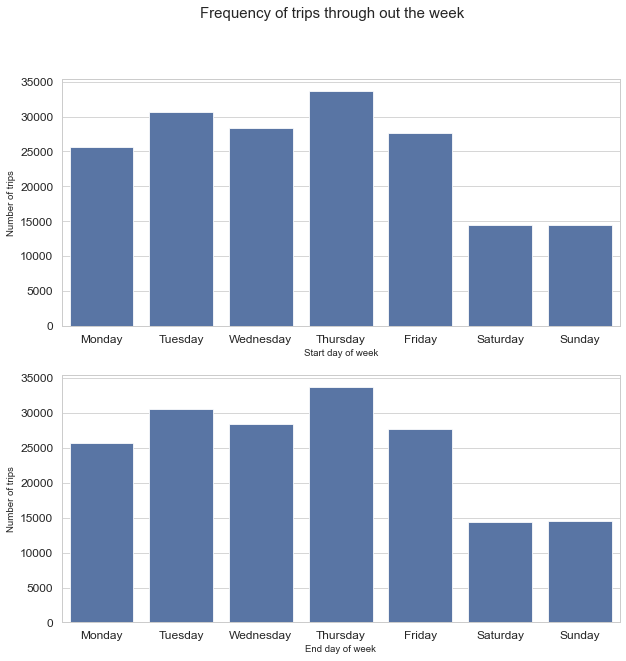

In [5]:
plt.figure(figsize = [10,10])
plt.suptitle('Frequency of trips through out the week', fontsize=15)

# start day
plt.subplot(2,1,1)
sns.countplot(data = df, x = 'start_day_of_week', color = base_color, 
              order = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']);
plt.xlabel('Start day of week');
plt.ylabel('Number of trips');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

# end day
plt.subplot(2,1,2)
sns.countplot(data = df, x = 'end_day_of_week', color = base_color, 
              order = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']);
plt.xlabel('End day of week');
plt.ylabel('Number of trips');
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

## Trip duration depending on user type and gender.

Based on user types, Subscribers have generally shorter trips than Customers.
<br> Based on genders, Males spend less time on trips than females and others.

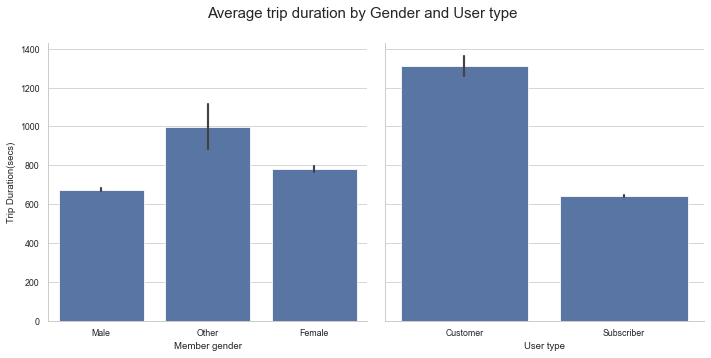

In [6]:
g = sns.PairGrid(data = df, y_vars="duration_sec", x_vars=["member_gender", "user_type"], height=5)
g.map(sns.barplot, color = base_color);
g.fig.suptitle('Average trip duration by Gender and User type', fontsize=15)
g.fig.subplots_adjust(top=0.88)
g.axes[0,0].yaxis.set_label_text('Trip Duration(secs)')
g.axes[0,0].xaxis.set_label_text('Member gender')
g.axes[0,1].xaxis.set_label_text('User type');

In [ ]:
!jupyter nbconvert Part_2_slide_deck.ipynb --to slides --post serve --no-input --no-prompt